In [1]:
import os
import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt

from tensorflow import keras as keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [8]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

def img_norm(x):
    return (x - x.mean(axis=(0,1,2), keepdims=True)) / x.std(axis=(0,1,2), keepdims=True)

In [6]:
loaded_model = keras.saving.load_model('nyoo_model_v2.h5',custom_objects={"f1_score": f1_score})

In [10]:
image1_data = Image.open('/Users/nyoosteven/Data Science/Intern/OCBC/signature_verification/sign_data/train/066/10_066.png')
image2_data = Image.open('/Users/nyoosteven/Data Science/Intern/OCBC/signature_verification/sign_data/train/066/03_066.png')

In [11]:
img_size = 224
image1_data = image1_data.resize((img_size, img_size))
image2_data = image2_data.resize((img_size, img_size))
image1_data = img_to_array(image1_data)
image2_data = img_to_array(image2_data)

# image1_data = preprocess_input(image1_data)
# image2_data = preprocess_input(image2_data)
image1_data = img_norm(image1_data)
image2_data = img_norm(image2_data)

Image1, Image2 = [],[]
Image1.append(image1_data)
Image2.append(image2_data)
Image1 = np.asarray(Image1).astype(np.float32)
Image2 = np.asarray(Image2).astype(np.float32)

predictions = loaded_model.predict([Image1, Image2], verbose=0)
print(predictions)

[[0.01030488]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


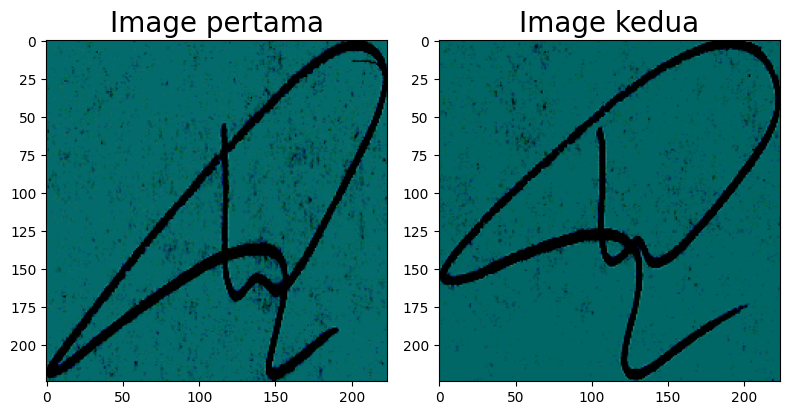

Hasil prediksi yang didapat adalah:  0.010304885


In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,6))
ax[0].imshow(image1_data)
ax[0].set_title('Image pertama', fontsize=20)

ax[1].imshow(image2_data)
ax[1].set_title('Image kedua', fontsize=20)

plt.tight_layout()
plt.show()

print("Hasil prediksi yang didapat adalah: ", predictions[0][0])